In [165]:
import sympy as sy
import tensorflow as tf
import numpy as np

In [166]:
x = sy.symbols('x')
f = sy.Function('f')(x)
dfdx = sy.Derivative(f,x)
eq = sy.Equality(dfdx**2,-f)
eq
sy.ode_order(eq,f)

1

In [167]:
eq.find(sy.Derivative(dfdx,x))

set()

In [168]:
df2dx2 = sy.Derivative(dfdx,x)
df2dx2

Derivative(f(x), (x, 2))

In [169]:
harmonico = sy.Equality(df2dx2 + x,0)
harmonico

Eq(x + Derivative(f(x), (x, 2)), 0)

In [170]:
sy.ode_order(harmonico,f)

2

In [171]:
df = np.empty(sy.ode_order(harmonico,f)+1,dtype=object)
for i in range(len(df)):
   df[i] = f.diff((x,i))
df

array([f(x), Derivative(f(x), x), Derivative(f(x), (x, 2))], dtype=object)

In [172]:
eq_homogenea = 0
for i in range(len(df)):
    eq_homogenea += sy.Symbol(f'C_{i}')*df[i]
eq_homogenea 

C_0*f(x) + C_1*Derivative(f(x), x) + C_2*Derivative(f(x), (x, 2))

In [173]:
system =harmonico.lhs + eq_homogenea
teste =sy.collect(system,df)

In [174]:
teste

C_0*f(x) + C_1*Derivative(f(x), x) + x + (C_2 + 1)*Derivative(f(x), (x, 2))

In [175]:
sy.Symbol('C_0')  in teste.args[1].args

True

In [181]:
order = []
for i in range(len(df)):
    for j in range(len(teste.args)):
        if sy.Symbol(f'C_{i}') in teste.args[j].args:
            order.append(i)
order
full_order = [0,1,2]
for i in order:
    full_order.remove(i)
full_order

[2]

In [213]:
x = tf.linspace(0.,2*np.pi,1000)
dn = []
with tf.GradientTape(persistent=True) as tape:
    tape.watch(x)
    y = tf.cos(x)
    dn.append(y)
    dndx = tape.gradient(y,x)
    dn.append(dndx)
    for i in range(1,sy.ode_order(harmonico,f)):
        dndx = tape.gradient(dndx,x)
        dn.append(dndx)
del tape


<tf.Tensor: shape=(1000,), dtype=float32, numpy=
array([-0.00000000e+00, -6.28943369e-03, -1.25786187e-02, -1.88673064e-02,
       -2.51552463e-02, -3.14421952e-02, -3.77278961e-02, -4.40121032e-02,
       -5.02945744e-02, -5.65750524e-02, -6.28532991e-02, -6.91290498e-02,
       -7.54020736e-02, -8.16721097e-02, -8.79389122e-02, -9.42022428e-02,
       -1.00461841e-01, -1.06717467e-01, -1.12968877e-01, -1.19215816e-01,
       -1.25458047e-01, -1.31695300e-01, -1.37927353e-01, -1.44153938e-01,
       -1.50374830e-01, -1.56589761e-01, -1.62798524e-01, -1.69000819e-01,
       -1.75196454e-01, -1.81385145e-01, -1.87566668e-01, -1.93740755e-01,
       -1.99907199e-01, -2.06065729e-01, -2.12216094e-01, -2.18358085e-01,
       -2.24491417e-01, -2.30615884e-01, -2.36731216e-01, -2.42837206e-01,
       -2.48933583e-01, -2.55020082e-01, -2.61096507e-01, -2.67162621e-01,
       -2.73218185e-01, -2.79262900e-01, -2.85296589e-01, -2.91318983e-01,
       -2.97329873e-01, -3.03328991e-01, -3.0931606

In [215]:
dn[1]

<tf.Tensor: shape=(1000,), dtype=float32, numpy=
array([-1.        , -0.9999802 , -0.9999209 , -0.999822  , -0.99968356,
       -0.9995056 , -0.999288  , -0.999031  , -0.9987344 , -0.99839836,
       -0.9980228 , -0.9976077 , -0.9971532 , -0.9966593 , -0.9961259 ,
       -0.9955531 , -0.99494094, -0.9942894 , -0.9935985 , -0.99286836,
       -0.9920989 , -0.9912903 , -0.99044234, -0.9895553 , -0.98862904,
       -0.98766375, -0.98665935, -0.9856159 , -0.9845335 , -0.98341215,
       -0.9822519 , -0.98105276, -0.9798148 , -0.97853816, -0.97722274,
       -0.9758687 , -0.97447604, -0.9730449 , -0.9715752 , -0.9700671 ,
       -0.9685206 , -0.96693575, -0.9653127 , -0.9636515 , -0.9619521 ,
       -0.9602147 , -0.9584393 , -0.956626  , -0.9547748 , -0.95288587,
       -0.95095927, -0.94899505, -0.9469933 , -0.94495404, -0.9428774 ,
       -0.94076353, -0.9386124 , -0.93642414, -0.93419886, -0.9319366 ,
       -0.9296375 , -0.9273016 , -0.924929  , -0.92251986, -0.9200742 ,
       -0.91759

In [197]:
dydx = tape.gradient(y,x)
dydx

<tf.Tensor: shape=(1000,), dtype=float32, numpy=
array([-0.00000000e+00, -6.28943369e-03, -1.25786187e-02, -1.88673064e-02,
       -2.51552463e-02, -3.14421952e-02, -3.77278961e-02, -4.40121032e-02,
       -5.02945744e-02, -5.65750524e-02, -6.28532991e-02, -6.91290498e-02,
       -7.54020736e-02, -8.16721097e-02, -8.79389122e-02, -9.42022428e-02,
       -1.00461841e-01, -1.06717467e-01, -1.12968877e-01, -1.19215816e-01,
       -1.25458047e-01, -1.31695300e-01, -1.37927353e-01, -1.44153938e-01,
       -1.50374830e-01, -1.56589761e-01, -1.62798524e-01, -1.69000819e-01,
       -1.75196454e-01, -1.81385145e-01, -1.87566668e-01, -1.93740755e-01,
       -1.99907199e-01, -2.06065729e-01, -2.12216094e-01, -2.18358085e-01,
       -2.24491417e-01, -2.30615884e-01, -2.36731216e-01, -2.42837206e-01,
       -2.48933583e-01, -2.55020082e-01, -2.61096507e-01, -2.67162621e-01,
       -2.73218185e-01, -2.79262900e-01, -2.85296589e-01, -2.91318983e-01,
       -2.97329873e-01, -3.03328991e-01, -3.0931606

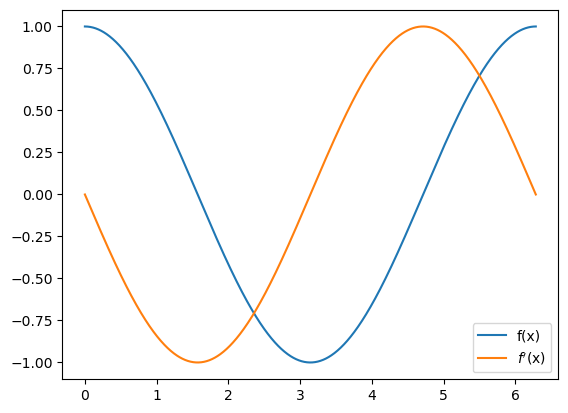

In [200]:
import matplotlib.pyplot as plt

plt.plot(x,y,label='f(x)')
plt.plot(x,dydx,label="$f^\prime$(x)")
plt.legend()